# ASX 200 Market Analysis

This notebook analyzes Australian Securities Exchange (ASX 200) historical data to uncover key market patterns. The data was retrieved using yfinance and saved to CSV for analysis.

We focus on:
- Historical price trends and cumulative returns
- Identifying significant momentum periods for traders

In [51]:
# import the necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
data = pd.read_csv('ASX200_full.csv', skiprows=[0,1], parse_dates=['Date'], index_col='Date')

## Data Preparation

The first step is loading the ASX 200 dataset from our CSV file. The data contains daily market information including price data and trading volume.

We'll handle formatting issues such as skipping header rows and parsing dates.

In [52]:
# verify data types
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8219 entries, 1992-11-23 to 2025-05-30
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 1  8219 non-null   float64
 1   Unnamed: 2  8219 non-null   float64
 2   Unnamed: 3  8219 non-null   float64
 3   Unnamed: 4  8219 non-null   float64
 4   Unnamed: 5  8219 non-null   float64
 5   Unnamed: 6  8219 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 449.5 KB


,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
Date,,,,,,
1992-11-23,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,0
1992-11-24,1458.400024,1458.400024,1458.400024,1458.400024,1458.400024,0
1992-11-25,1467.900024,1467.900024,1467.900024,1467.900024,1467.900024,0
1992-11-26,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,0
1992-11-27,1458.900024,1458.900024,1458.900024,1458.900024,1458.900024,0


## Data Inspection

Before analysis, we inspect the dataset to understand its structure and data types.

This ensures our analysis is built on clean, properly formatted data.

In [53]:
# We can already see a range of issues -- columns wrong, all datatypes are objects, at least 1 row of null values, etc. 
data.rename(columns={
    'Unnamed: 1': 'adj_close',
    'Unnamed: 2': 'close',
    'Unnamed: 3': 'high',
    'Unnamed: 4': 'low',
    'Unnamed: 5': 'open',
    'Unnamed: 6': 'volume'
}, inplace=True)

# remove index, check date is datetime with True, lowercase column names, set date as index
data.reset_index(inplace=True)  
print(data['Date'].dtype == 'datetime64[ns]')
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.set_index('date', inplace=True)

True


## Data Cleaning

We need to prepare our data for analysis:

1. Rename columns with proper descriptive names and convert to lowercase
2. Format date fields properly and set date as index for time series analysis

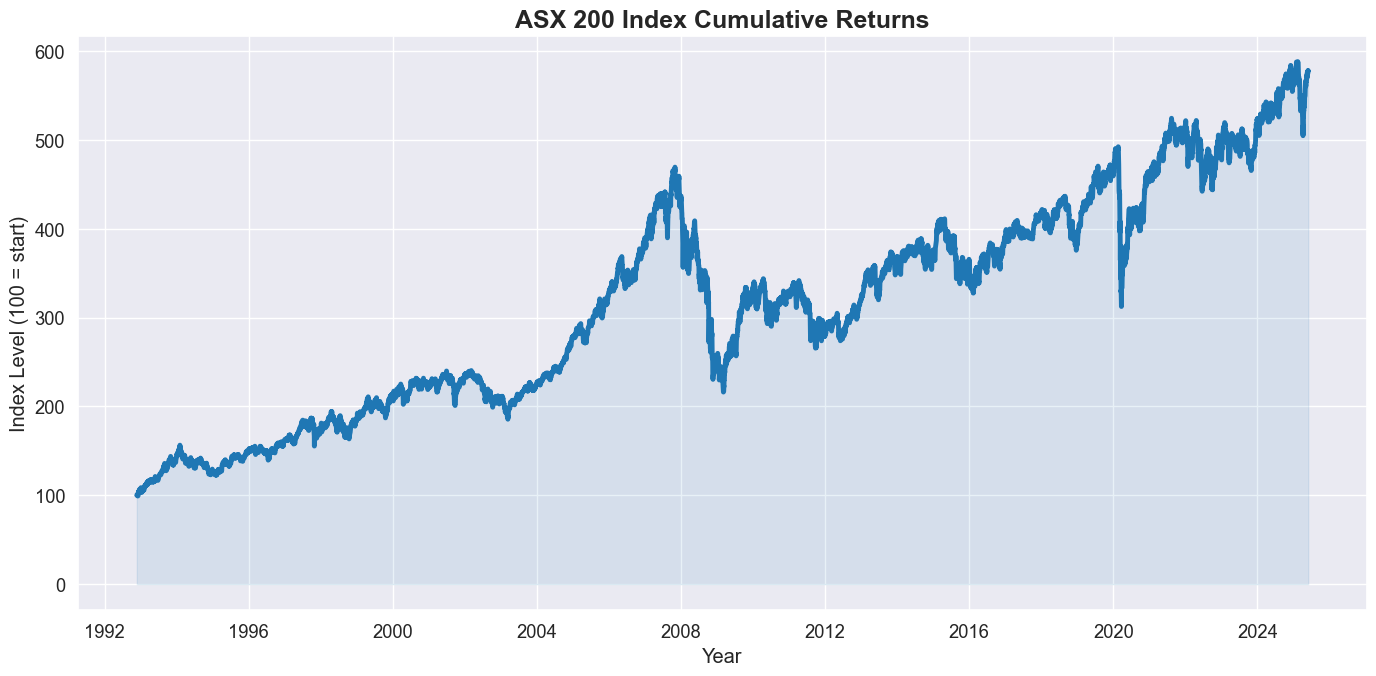

In [67]:
# use fresh data
df = data.copy()

# calculate daily returns and cumulative returns
df['daily_ret']    = df['close'].pct_change().fillna(0)
df['cumulative_return'] = (1 + df['daily_ret']).cumprod() * 100

# build the plot
sns.set(style="darkgrid", font_scale=1.2)
plt.figure(figsize=(14, 7))

ax = sns.lineplot(x=data.index, y='cumulative_return', data=df, linewidth=3.5, color='#1f77b4')
ax.set_xlabel("Year")
ax.set_ylabel("Index Level (100 = start)")
ax.fill_between(data.index, 0, df['cumulative_return'], color='#1f77b4', alpha=0.1)

plt.title("ASX 200 Index Cumulative Returns", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


## Cumulative Returns Analysis

With clean data, we now analyze market returns:

1. Calculate daily and cumulative returns based on closing prices
2. Visualize ASX 200 performance over time with an area chart

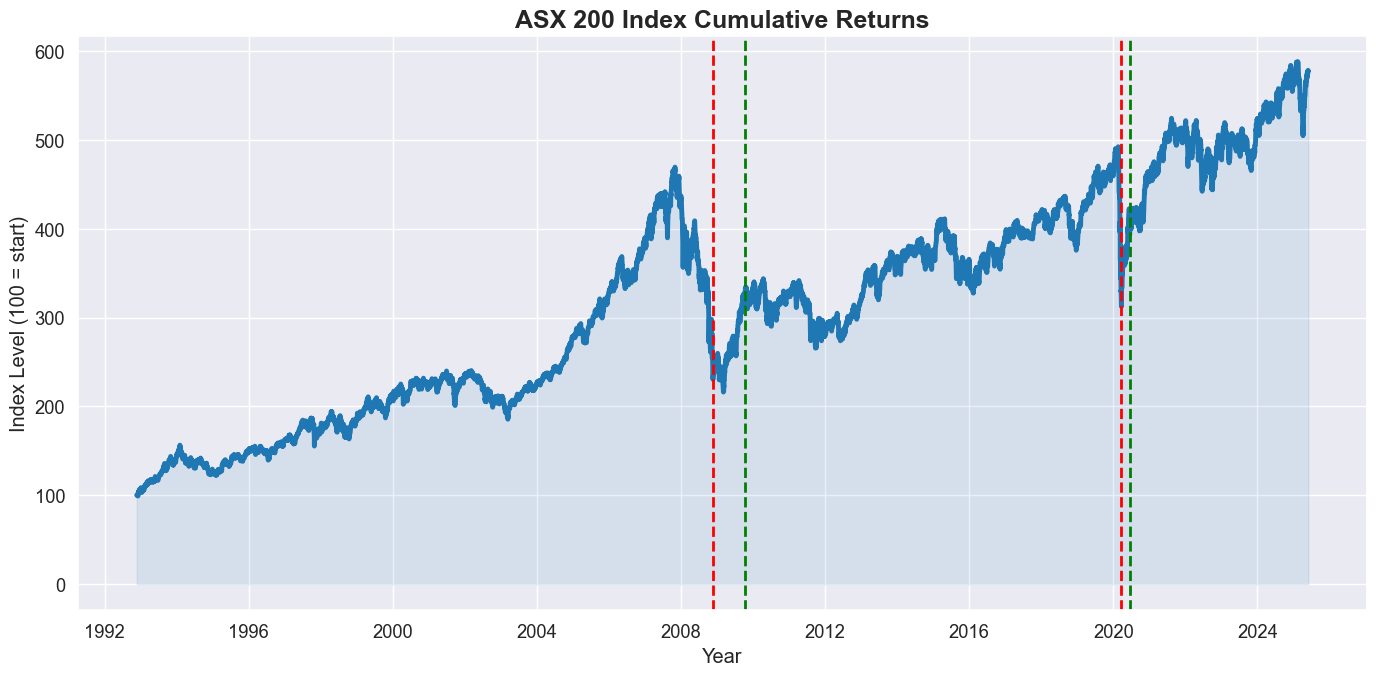

In [69]:
# adjust plot to show best and worst moments for momentum traders
# use fresh data
df = data.copy()

# calculate daily returns and cumulative returns
df['daily_ret']    = df['close'].pct_change().fillna(0)
df['cumulative_return'] = (1 + df['daily_ret']).cumprod() * 100

# 3 month returns 
df['ret_3m'] = df['close'].pct_change(63)

# best and worst moments
top2 = df['ret_3m'].nlargest(2)
bot2 = df['ret_3m'].nsmallest(2)

# build the plot
sns.set(style="darkgrid", font_scale=1.2)
plt.figure(figsize=(14, 7))

ax = sns.lineplot(x=data.index, y='cumulative_return', data=df, linewidth=3.5, color='#1f77b4')
ax.set_xlabel("Year")
ax.set_ylabel("Index Level (100 = start)")
ax.fill_between(data.index, 0, df['cumulative_return'], color='#1f77b4', alpha=0.1)

# 6. Annotate extremes
for d in top2.index:
    ax.axvline(d, color='green', linestyle='--', linewidth=2,
               label='Top 3m growth' if 'Top 3m growth' not in ax.get_legend_handles_labels()[1] else "")
for d in bot2.index:
    ax.axvline(d, color='red',   linestyle='--', linewidth=2,
               label='Top 3m loss'   if 'Top 3m loss'   not in ax.get_legend_handles_labels()[1] else "")


plt.title("ASX 200 Index Cumulative Returns", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()
    

## Key Findings

From our analysis of the ASX 200 index:

1. **Long-term Growth Pattern**: Despite volatility, the ASX 200 shows an overall upward trajectory, confirming long-term growth potential.

2. **Momentum Significance**: The highlighted extreme periods (green/red lines) represent critical market junctures that often coincide with major economic events.

## Future Analysis Directions

Two promising avenues for further analysis:

1. **Sector-Specific Performance**: Breaking down ASX 200 by sectors would reveal which industries drive market movements during different economic cycles.

2. **Correlation with Global Markets**: Analyzing how ASX 200 correlates with other major indices would provide insights into Australia's economic integration globally.

## Momentum Analysis

Momentum is a key concept for traders and investors. We identify:

1. Best and worst 3-month (63 trading day) return periods
2. Visualize these extreme periods with green and red lines on our chart